#### 地图搜索
- networkx的用法
- DFS
- BFS

In [20]:
BEIJING, CHANGCHUN, WULUMUQI, WUHAN, GUANGZHOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = """
北京 长春 乌鲁木齐 武汉 广州 深圳 曼谷 上海 纽约
""".split()

In [21]:
connection = {
    CHANGCHUN:[BEIJING],
    WULUMUQI:[BEIJING],
    BEIJING:[WULUMUQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK:[BEIJING,SHANGHAI],
    SHANGHAI:[NEWYORK, WUHAN],
    WUHAN:[SHANGHAI, BEIJING, GUANGZHOU],
    GUANGZHOU:[WUHAN, BANGKOK],
    SHENZHEN:[WUHAN, BANGKOK],
    BANGKOK:[SHENZHEN, GUANGZHOU]
}

In [79]:
connection[CHANGCHUN]

['北京']

In [23]:
import networkx as nx
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']

In [140]:
from collections import defaultdict

# BFS
def navigator(start, distination, connection_graph):
    paths = [[start]]
    visited = set()
    results = []
    while paths:
        path = paths.pop(0)
        current = path[-1]
        
        if current in visited:
            continue;
        visited.add(current)
        
        nexts = connection_graph[current]
        for next in nexts:

            current_path = path + [next]
            if next == distination:
                results.append(current_path)
            paths.append(current_path)
    return results

# assignment2: DFS
def navigator_dfs(start, destination, connection_graph):
    paths = [[start]]
    visited = set()
    result = []
    while paths:
        path = paths.pop(0)
        current = path[-1]
        
        if current in visited:
            continue

        for next in connection_graph[current]:
            current_path = path + [next]
            if next == destination:
                result.append(current_path)
            paths = [current_path] + paths
        
        visited.add(current)

    return result
    
# 该函数将有向图转化为无向图    
def diGraph_Graph(connection_graph):
    connection = defaultdict(list)
    for key, values in connection_graph.items():
        for value in values:
            if(value in connection[key]):
                continue
            else:
                connection[key].append(value)
            if key in connection[value]:
                continue
            else:
                connection[value].append(key)
    return connection

def draw(routes):
    for i,route in enumerate(routes):
        print(i,"->".join(route))

In [141]:
navigator_dfs("曼谷", "北京", connection)

[['曼谷', '广州', '武汉', '北京'],
 ['曼谷', '广州', '武汉', '北京', '纽约', '北京'],
 ['曼谷', '广州', '武汉', '北京', '长春', '北京'],
 ['曼谷', '广州', '武汉', '北京', '乌鲁木齐', '北京']]

In [142]:
navigator("曼谷", "北京", connection)

[['曼谷', '深圳', '武汉', '北京'],
 ['曼谷', '深圳', '武汉', '上海', '纽约', '北京'],
 ['曼谷', '深圳', '武汉', '北京', '乌鲁木齐', '北京'],
 ['曼谷', '深圳', '武汉', '北京', '长春', '北京']]

In [92]:
connection

{'长春': ['北京'],
 '乌鲁木齐': ['北京'],
 '北京': ['乌鲁木齐', '长春', '武汉', '深圳', '纽约'],
 '纽约': ['北京', '上海'],
 '上海': ['纽约', '武汉'],
 '武汉': ['上海', '北京', '广州'],
 '广州': ['武汉', '曼谷'],
 '深圳': ['武汉', '曼谷'],
 '曼谷': ['深圳', '广州']}

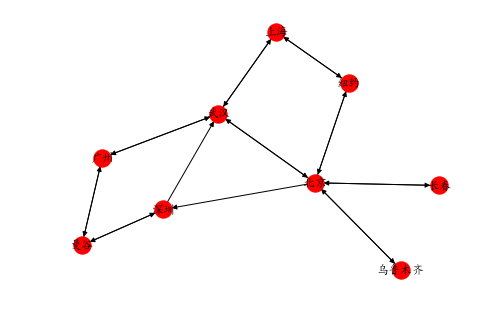

In [93]:
graph = connection
g = nx.DiGraph(graph)
nx.draw(g, with_labels = True)

In [94]:
diGraph_Graph(connection)

defaultdict(list,
            {'长春': ['北京'],
             '北京': ['长春', '乌鲁木齐', '武汉', '深圳', '纽约'],
             '乌鲁木齐': ['北京'],
             '武汉': ['北京', '上海', '广州', '深圳'],
             '深圳': ['北京', '武汉', '曼谷'],
             '纽约': ['北京', '上海'],
             '上海': ['纽约', '武汉'],
             '广州': ['武汉', '曼谷'],
             '曼谷': ['广州', '深圳']})

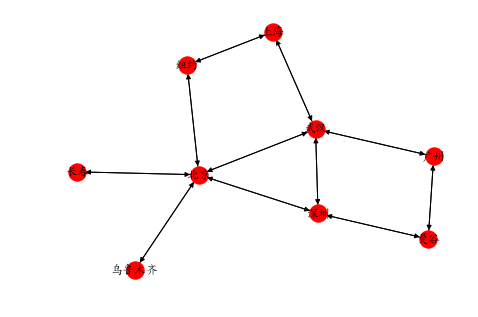

In [95]:
graph = diGraph_Graph(connection)
g = nx.DiGraph(graph)
nx.draw(g, with_labels = True)

In [120]:
# 该结果所给的对应的有向图, 最短路径只需返回第一个结果即可
print("有向图对应结果:",navigator("曼谷", "北京", connection))

print("无向图对应结果:", navigator("曼谷", "北京",diGraph_Graph(connection)))

有向图对应结果: [['曼谷', '深圳', '武汉', '北京'], ['曼谷', '深圳', '武汉', '上海', '纽约', '北京'], ['曼谷', '深圳', '武汉', '北京', '乌鲁木齐', '北京'], ['曼谷', '深圳', '武汉', '北京', '长春', '北京']]
无向图对应结果: [['曼谷', '深圳', '北京'], ['曼谷', '广州', '武汉', '北京'], ['曼谷', '深圳', '北京', '长春', '北京'], ['曼谷', '深圳', '北京', '乌鲁木齐', '北京'], ['曼谷', '深圳', '北京', '纽约', '北京']]


In [143]:
a = [ [1,2], [2,3]]
a + [3]
                

[[1, 2], [2, 3], 3]

####  语法解析

In [152]:
def parse_grammer(grammer_str, sep = '=>'):
    grammer = {}
    for line in grammer_str.split('\n'):
        line = line.strip()
        if not line:
            continue
        target, rules = line.split(sep)
        grammer[target.strip()] = [r.split() for r in rules.split('|')]
        
    return grammer

In [148]:
decimal_grammar = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | num num
op = + | - | * | /
"""

In [154]:
parse_grammer(decimal_grammar, sep = '=')

{'expression': [['operator', 'op', 'operator']],
 'operator': [['num', 'op', 'num']],
 'num': [['0'],
  ['1'],
  ['2'],
  ['3'],
  ['4'],
  ['5'],
  ['6'],
  ['7'],
  ['8'],
  ['9'],
  ['num', 'num']],
 'op': [['+'], ['-'], ['*'], ['/']]}

In [157]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [162]:
g = parse_grammer(grammar)

In [166]:
import random
def gene(parsed_grammer, target = 'sentence'):
    if target not in parsed_grammer: return target
    
    rule = random.choice(parsed_grammer[target])
    return ''.join(gene(parsed_grammer, target = r) for r in rule if r!='null')

In [167]:
g['sentence']

[['noun_phrase', 'verb_phrase']]

In [168]:
gene(g)

'一个好看的蓝色的篮球听着这个好看的小猫'